<a href="https://colab.research.google.com/github/Gracey701/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Stroke

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

## About the data
- Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
- About: Dataset used to predict if a pateitn is likely to get a stroke or not depending on the following features below such as gender, age, etc.
- Target: stroke (1:had stroke, 0: no stroke)
- Row represents: patient
- Type: Classification
- Features: 11 features not including target
- Rows: 5110
- Challenges: choosing what kind of imputation to use

In [3]:
stroke = pd.read_csv('/content/archive (2).zip')
#copies of dataframe
eda_stroke = stroke.copy()
ml_stroke = stroke.copy()
stroke.info()
stroke.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploring and Cleaning Data

- Don't need id column as it's unique to each row

In [4]:
# delete unnecessary column(s)
eda_stroke = stroke.drop(columns=['id'])
eda_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#no duplicates
eda_stroke.duplicated().sum()

0

In [6]:
eda_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi columns has 201 missing values
- won't drop as it's above 2% of data
- can fill in missing values with average of all bmi values for exploratory purposes as it is a float feature
- use simple imputation in a pipeline using average value for preprocessing on training data

In [7]:
avg_bmi = eda_stroke['bmi'].mean()
eda_stroke['bmi'].fillna(avg_bmi, inplace=True)
eda_stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Check for inconsistencies in categorical features

In [8]:
eda_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
eda_stroke['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [10]:
eda_stroke['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [11]:
eda_stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
eda_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
eda_stroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [14]:
eda_stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

## Visuals

### Univariate Exploratory

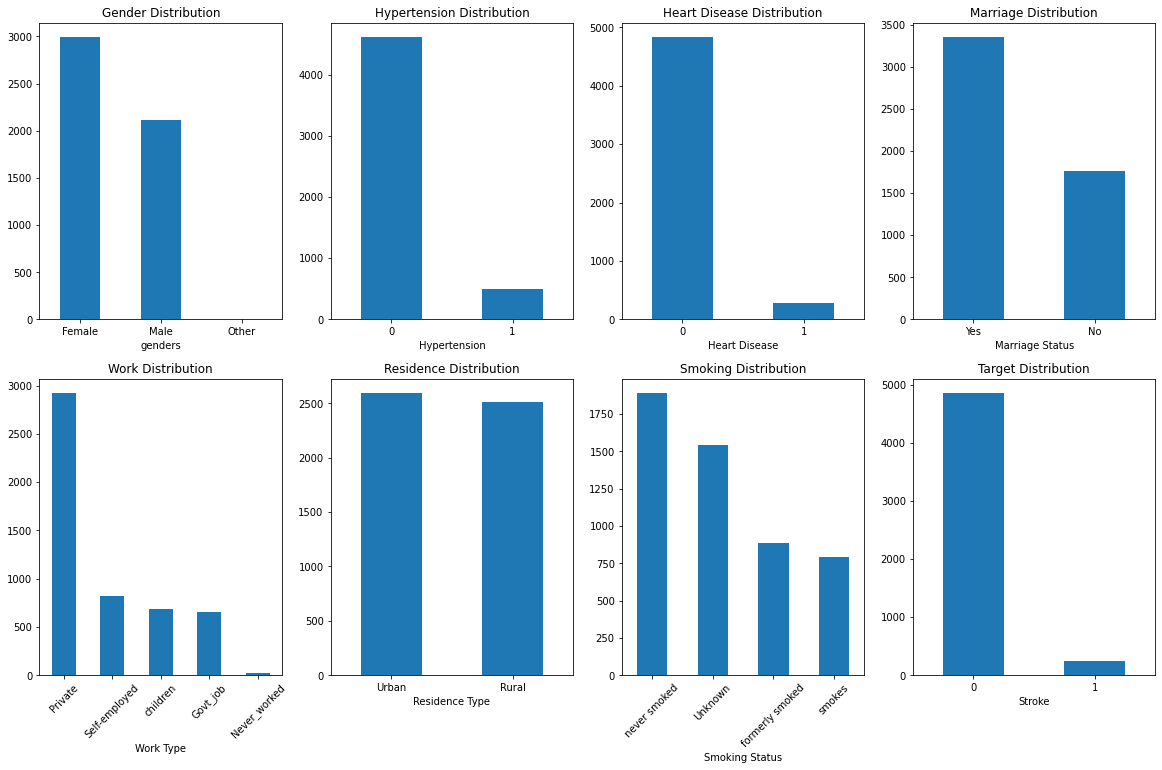

In [15]:
plt.figure(figsize=(20,12))
#make subplots 
plt.subplot(2,4,1)
eda_stroke['gender'].value_counts().plot(kind = 'bar')
plt.xlabel('genders')
plt.xticks(rotation=0)
plt.title('Gender Distribution')

plt.subplot(2,4,2)
eda_stroke['hypertension'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension')
plt.xticks(rotation=0)
plt.title('Hypertension Distribution')

plt.subplot(2,4,3)
eda_stroke['heart_disease'].value_counts().plot(kind = 'bar')
plt.xlabel('Heart Disease')
plt.xticks(rotation=0)
plt.title('Heart Disease Distribution')

plt.subplot(2,4,4)
eda_stroke['ever_married'].value_counts().plot(kind = 'bar')
plt.xlabel('Marriage Status')
plt.xticks(rotation=0)
plt.title('Marriage Distribution')

plt.subplot(2,4,5)
eda_stroke['work_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.title('Work Distribution')

plt.subplot(2,4,6)
eda_stroke['Residence_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Residence Type')
plt.xticks(rotation=0)
plt.title('Residence Distribution')

plt.subplot(2,4,7)
eda_stroke['smoking_status'].value_counts().plot(kind = 'bar')
plt.xlabel('Smoking Status')
plt.xticks(rotation=45)
plt.title('Smoking Distribution')

plt.subplot(2,4,8)
eda_stroke['stroke'].value_counts().plot(kind = 'bar')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.title('Target Distribution');

Text(0.5, 1.0, 'Bmi Distribution')

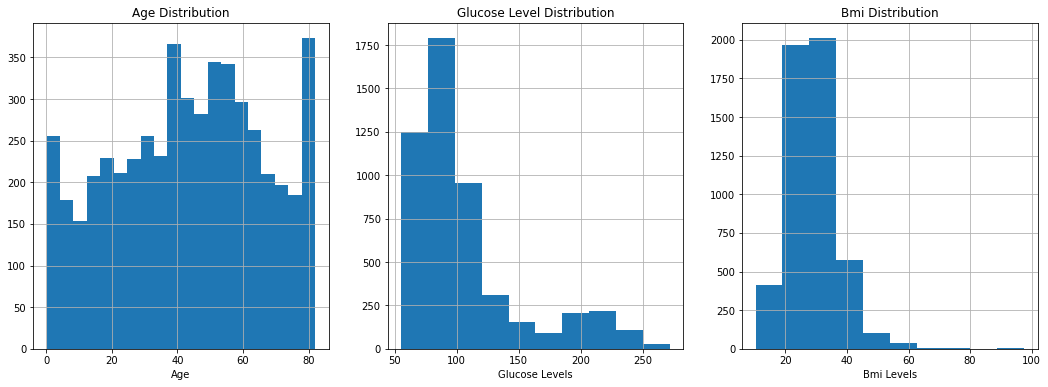

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
eda_stroke['age'].hist(bins='auto')
plt.xlabel('Age')
plt.title('Age Distribution')

plt.subplot(1,3,2)
eda_stroke['avg_glucose_level'].hist()
plt.xlabel('Glucose Levels')
plt.title('Glucose Level Distribution')

plt.subplot(1,3,3)
eda_stroke['bmi'].hist()
plt.xlabel('Bmi Levels')
plt.title('Bmi Distribution')

### Outliers

In [17]:
eda_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


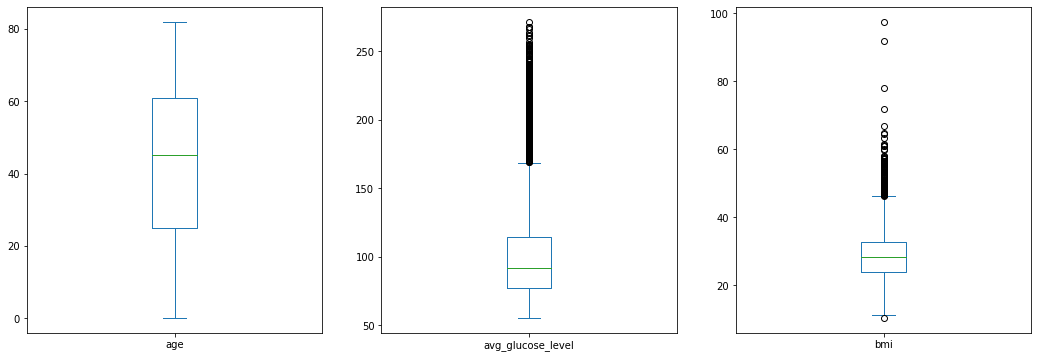

In [18]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
eda_stroke['age'].plot(kind='box')

plt.subplot(1,3,2)
eda_stroke['avg_glucose_level'].plot(kind='box')

plt.subplot(1,3,3)
eda_stroke['bmi'].plot(kind='box');

avg_glucose_level and bmi columns have many outliers surpassing the maximum value

### Finding trends via heatmap

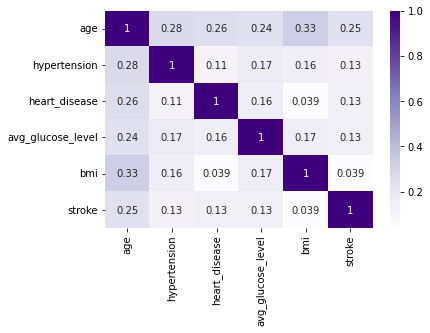

There are no strong correlations between the target and other features. This goes for between features as well. 
The strongest correlation is a rate of 0.0.33 between age and bmi. 
The highest correlation between the target and another feature would be with age, being 0.25.


In [19]:
import seaborn as sns
corr = eda_stroke.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);
plt.show()
print('There are no strong correlations between the target and other features. This goes for between features as well. \nThe strongest correlation is a rate of 0.0.33 between age and bmi. \nThe highest correlation between the target and another feature would be with age, being 0.25.')

### Multivariate Exploratory

replacing all the 1 and 0 with pos and neg for easier understanding of graphs

In [20]:
eda_stroke['hypertension'] = eda_stroke['hypertension'].replace({1: 'pos', 0: 'neg'})
eda_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,neg,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,neg,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,neg,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,neg,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,pos,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [21]:
eda_stroke['heart_disease'] = eda_stroke['heart_disease'].replace({1: 'pos', 0: 'neg'})
eda_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,neg,pos,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,neg,neg,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,neg,pos,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,neg,neg,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,pos,neg,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [22]:
eda_stroke['stroke'] = eda_stroke['stroke'].replace({1: 'pos', 0: 'neg'})
eda_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,neg,pos,Yes,Private,Urban,228.69,36.600000,formerly smoked,pos
1,Female,61.0,neg,neg,Yes,Self-employed,Rural,202.21,28.893237,never smoked,pos
2,Male,80.0,neg,pos,Yes,Private,Rural,105.92,32.500000,never smoked,pos
3,Female,49.0,neg,neg,Yes,Private,Urban,171.23,34.400000,smokes,pos
4,Female,79.0,pos,neg,Yes,Self-employed,Rural,174.12,24.000000,never smoked,pos


#### Stroke vs Age

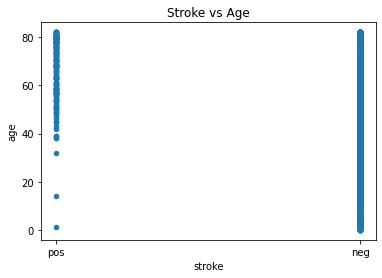

The data has a variety of non-stroke patients of all ages, whereas those who have had strokes are mostly in the ranges of around 40-80.


In [23]:
eda_stroke.plot.scatter(x = 'stroke', y = 'age')
plt.title('Stroke vs Age');
plt.show()
print('The data has a variety of non-stroke patients of all ages, whereas those who have had strokes are mostly in the ranges of around 40-80.')

In [24]:
avg_age = eda_stroke.groupby('stroke')['age'].mean()
avg_age

stroke
neg    41.971545
pos    67.728193
Name: age, dtype: float64

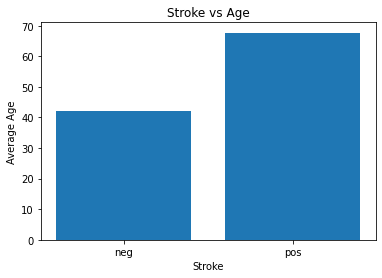

Those that have had strokes tend to be much older on average than those who have not. 
This reflects the positive correlation displayed by the heatmap.


In [25]:
plt.bar(avg_age.index, avg_age.values)
plt.ylabel('Average Age')
plt.xlabel('Stroke')
plt.title('Stroke vs Age');
plt.show()
print('Those that have had strokes tend to be much older on average than those who have not. \nThis reflects the positive correlation displayed by the heatmap.')

#### Stroke vs Glucose Lvl

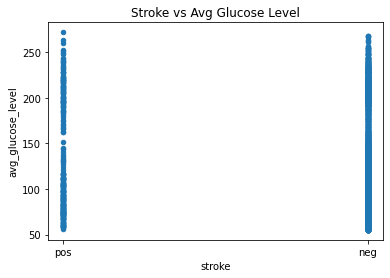

There does not seem to be a clear trend between having a stroke and average glucose level based off the scatter plot.


In [26]:
eda_stroke.plot.scatter(x = 'stroke', y = 'avg_glucose_level')
plt.title('Stroke vs Avg Glucose Level');
plt.show()
print('There does not seem to be a clear trend between having a stroke and average glucose level based off the scatter plot.')

In [27]:
avg_glu = eda_stroke.groupby('stroke')['avg_glucose_level'].mean()
avg_glu

stroke
neg    104.795513
pos    132.544739
Name: avg_glucose_level, dtype: float64

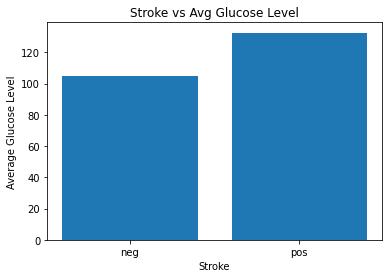

Those with higher average glucose levels seem to have a higher chance of having a stroke.


In [28]:
plt.bar(avg_glu.index, avg_glu.values)
plt.ylabel('Average Glucose Level')
plt.xlabel('Stroke')
plt.title('Stroke vs Avg Glucose Level');
plt.show()
print('Those with higher average glucose levels seem to have a higher chance of having a stroke.')

#### Stroke vs BMI

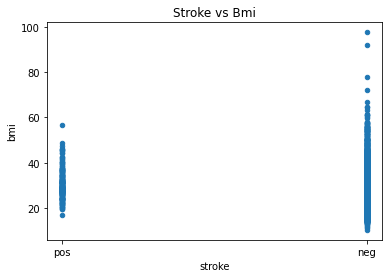

Most patients represented in the data seem to have bmi levels between 20 and 50, regardless of having strokes or not. 
However the group of no strokes have some stretching out to 100 bmi.


In [29]:
eda_stroke.plot.scatter(x = 'stroke', y = 'bmi')
plt.title('Stroke vs Bmi');
plt.show()
print('Most patients represented in the data seem to have bmi levels between 20 and 50, regardless of having strokes or not. \nHowever the group of no strokes have some stretching out to 100 bmi.')

In [30]:
avg_bmi = eda_stroke.groupby('stroke')['bmi'].mean()
avg_bmi

stroke
neg    28.825388
pos    30.217789
Name: bmi, dtype: float64

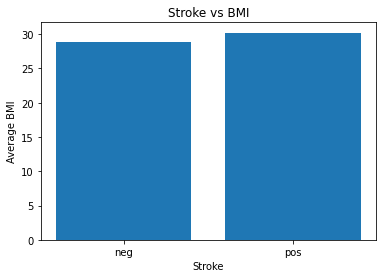

BMI had the weakest correlation with the target variable which is further supported in this bar graph. Both groups have a similar bmi average.


In [31]:
plt.bar(avg_bmi.index, avg_bmi.values)
plt.ylabel('Average BMI')
plt.xlabel('Stroke')
plt.title('Stroke vs BMI');
plt.show()
print('BMI had the weakest correlation with the target variable which is further supported in this bar graph. Both groups have a similar bmi average.')

#### Grouped by Smoke Status

In [32]:
smoke_group = eda_stroke.groupby(['smoking_status','stroke']).mean().reset_index()
smoke_group

,smoking_status,stroke,age,avg_glucose_level,bmi
0,Unknown,neg,29.112011,98.810127,25.687648
1,Unknown,pos,65.836596,124.808936,29.176133
2,formerly smoked,neg,53.753374,111.175092,30.648912
3,formerly smoked,pos,68.628571,132.806857,30.620173
4,never smoked,neg,45.567703,106.292042,29.940716
5,never smoked,pos,70.311111,132.907222,30.336216
6,smokes,neg,46.212851,106.219906,30.433425
7,smokes,pos,62.809524,139.987857,30.459041


In [33]:
smoke_group_glu = smoke_group.sort_values(by = 'avg_glucose_level')
smoke_group_glu

,smoking_status,stroke,age,avg_glucose_level,bmi
0,Unknown,neg,29.112011,98.810127,25.687648
6,smokes,neg,46.212851,106.219906,30.433425
4,never smoked,neg,45.567703,106.292042,29.940716
2,formerly smoked,neg,53.753374,111.175092,30.648912
1,Unknown,pos,65.836596,124.808936,29.176133
3,formerly smoked,pos,68.628571,132.806857,30.620173
5,never smoked,pos,70.311111,132.907222,30.336216
7,smokes,pos,62.809524,139.987857,30.459041


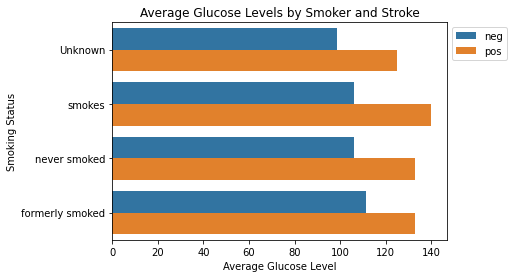

Those that have had strokes have the highest average glucose level within their smoking status group. 
Those that have smoked have the highest average glucose level within the ones that had stokes. 
Overall those that have smokes generally have higher glucose levels and those that have even higher levels have had strokes.


In [34]:
sns.barplot(data = smoke_group_glu, x = 'avg_glucose_level', y = 'smoking_status', hue = 'stroke')
plt.title('Average Glucose Levels by Smoker and Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Smoking Status')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('Those that have had strokes have the highest average glucose level within their smoking status group. \nThose that have smoked have the highest average glucose level within the ones that had stokes. \nOverall those that have smokes generally have higher glucose levels and those that have even higher levels have had strokes.')

In [35]:
smoke_group_age = smoke_group.sort_values(by = 'age')
smoke_group_age

,smoking_status,stroke,age,avg_glucose_level,bmi
0,Unknown,neg,29.112011,98.810127,25.687648
4,never smoked,neg,45.567703,106.292042,29.940716
6,smokes,neg,46.212851,106.219906,30.433425
2,formerly smoked,neg,53.753374,111.175092,30.648912
7,smokes,pos,62.809524,139.987857,30.459041
1,Unknown,pos,65.836596,124.808936,29.176133
3,formerly smoked,pos,68.628571,132.806857,30.620173
5,never smoked,pos,70.311111,132.907222,30.336216


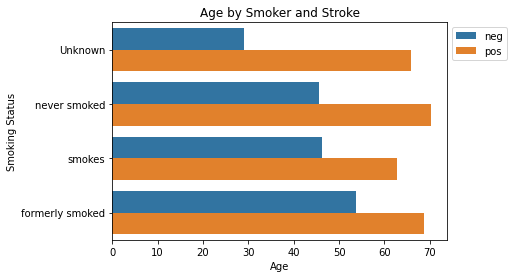

Within all groups, most of the older ones have had strokes whereas the younger ones have not. 
The ones that currently smoke have strokes at a younger age on average than those who have never smoked.


In [36]:
sns.barplot(data = smoke_group_age, x = 'age', y = 'smoking_status', hue = 'stroke')
plt.title('Age by Smoker and Stroke')
plt.xlabel('Age')
plt.ylabel('Smoking Status')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('Within all groups, most of the older ones have had strokes whereas the younger ones have not. \nThe ones that currently smoke have strokes at a younger age on average than those who have never smoked.')

#### Grouped by Residence Type

In [37]:
res_group = eda_stroke.groupby(['Residence_type','stroke']).mean().reset_index()
res_group

,Residence_type,stroke,age,avg_glucose_level,bmi
0,Rural,neg,41.729017,105.245746,28.845063
1,Rural,pos,67.570175,130.153947,29.928117
2,Urban,neg,42.208062,104.356440,28.806200
3,Urban,pos,67.861630,134.563630,30.462401


In [38]:
res_group_glu = res_group.sort_values(by = 'avg_glucose_level')
res_group_glu

,Residence_type,stroke,age,avg_glucose_level,bmi
2,Urban,neg,42.208062,104.356440,28.806200
0,Rural,neg,41.729017,105.245746,28.845063
1,Rural,pos,67.570175,130.153947,29.928117
3,Urban,pos,67.861630,134.563630,30.462401


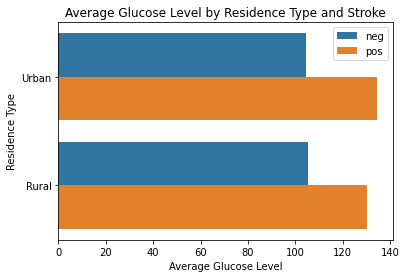

Those that live in rural and urban residences seem to have similar glucose levels on average for those that have not had strokes. 
Those that live in the urban area and HAVE HAD strokes have slightly higher glucose levels by about 30.


In [39]:
sns.barplot(data = res_group_glu, x = 'avg_glucose_level', y = 'Residence_type', hue = 'stroke')
plt.title('Average Glucose Level by Residence Type and Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Residence Type')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('Those that live in rural and urban residences seem to have similar glucose levels on average for those that have not had strokes. \nThose that live in the urban area and HAVE HAD strokes have slightly higher glucose levels by about 30.')

In [40]:
res_group_age = res_group.sort_values(by = 'age')
res_group_age

,Residence_type,stroke,age,avg_glucose_level,bmi
0,Rural,neg,41.729017,105.245746,28.845063
2,Urban,neg,42.208062,104.356440,28.806200
1,Rural,pos,67.570175,130.153947,29.928117
3,Urban,pos,67.861630,134.563630,30.462401


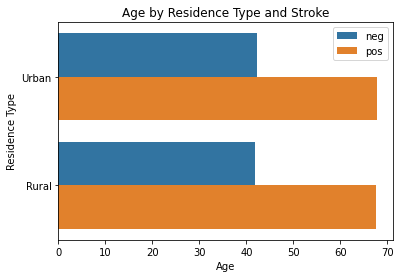

On average, those that are older have had strokes from both residence types compared to the younger generation. 
There is no clear correlation between residence type and age with having strokes.


In [41]:
sns.barplot(data = res_group_glu, x = 'age', y = 'Residence_type', hue = 'stroke')
plt.title('Age by Residence Type and Stroke')
plt.xlabel('Age')
plt.ylabel('Residence Type')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('On average, those that are older have had strokes from both residence types compared to the younger generation. \nThere is no clear correlation between residence type and age with having strokes.')

#### Grouped by Heart Disease

In [42]:
heart_group = eda_stroke.groupby(['heart_disease','stroke']).mean().reset_index()
heart_group

,heart_disease,stroke,age,avg_glucose_level,bmi
0,neg,neg,40.712150,103.490164,28.763404
1,neg,pos,66.778812,125.179257,30.158301
2,pos,neg,67.445415,131.198908,30.079145
3,pos,pos,71.808511,164.200638,30.473461


In [43]:
heart_group_glu = heart_group.sort_values(by = 'avg_glucose_level')
heart_group_glu 

,heart_disease,stroke,age,avg_glucose_level,bmi
0,neg,neg,40.712150,103.490164,28.763404
1,neg,pos,66.778812,125.179257,30.158301
2,pos,neg,67.445415,131.198908,30.079145
3,pos,pos,71.808511,164.200638,30.473461


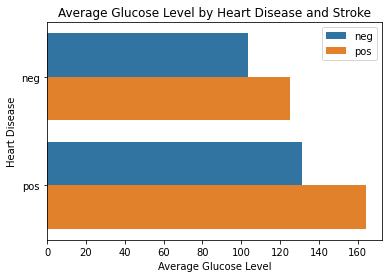

Those who have had heart disease all have higher glucose levels then their respective counterparts who have not. 
Furthermore, those who have had heart disease along with a significant high glucose level seem to get strokes.


In [44]:
sns.barplot(data = heart_group_glu, x = 'avg_glucose_level', y = 'heart_disease', hue = 'stroke')
plt.title('Average Glucose Level by Heart Disease and Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Heart Disease')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('Those who have had heart disease all have higher glucose levels then their respective counterparts who have not. \nFurthermore, those who have had heart disease along with a significant high glucose level seem to get strokes.')

In [45]:
heart_group_age = heart_group.sort_values(by = 'age')
heart_group_age

,heart_disease,stroke,age,avg_glucose_level,bmi
0,neg,neg,40.712150,103.490164,28.763404
1,neg,pos,66.778812,125.179257,30.158301
2,pos,neg,67.445415,131.198908,30.079145
3,pos,pos,71.808511,164.200638,30.473461


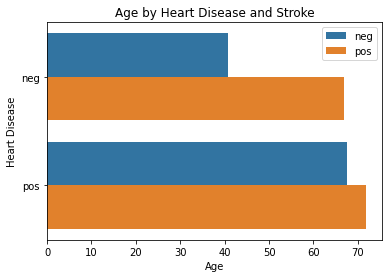

The older patients seem to be more likely to have heart diease as well as having strokes. 
Those that are younger generally have not had heart disease nor stroke. 


In [46]:
sns.barplot(data = heart_group_age, x = 'age', y = 'heart_disease', hue = 'stroke')
plt.title('Age by Heart Disease and Stroke')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('The older patients seem to be more likely to have heart diease as well as having strokes. \nThose that are younger generally have not had heart disease nor stroke. ')

##### Heart Disease Filter

In [47]:
heart_filter = eda_stroke['heart_disease'] == 'pos'
heartdisease = eda_stroke.loc[heart_filter, :]
no_heart = eda_stroke.loc[~heart_filter, :]
heartdisease.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,neg,pos,Yes,Private,Urban,228.69,36.600000,formerly smoked,pos
2,Male,80.0,neg,pos,Yes,Private,Rural,105.92,32.500000,never smoked,pos
6,Male,74.0,pos,pos,Yes,Private,Rural,70.09,27.400000,never smoked,pos
11,Female,61.0,neg,pos,Yes,Govt_job,Rural,120.46,36.800000,smokes,pos
13,Male,78.0,neg,pos,Yes,Private,Urban,219.84,28.893237,Unknown,pos


In [48]:
heartdisease['stroke'].value_counts()

neg    229
pos     47
Name: stroke, dtype: int64

In [49]:
no_heart['stroke'].value_counts()

neg    4632
pos     202
Name: stroke, dtype: int64

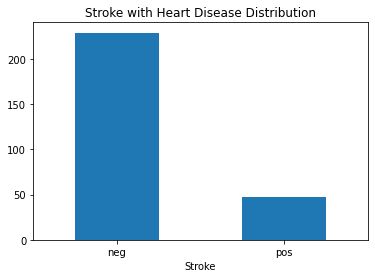

Among those that have heart disease, most of them have not had a stroke. The rate is about 47/229 which is about 21%. 
This means there was a 21% chance of having a stroke if you have heart disease.


In [50]:
heartdisease['stroke'].value_counts().plot(kind='bar')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.title('Stroke with Heart Disease Distribution');
plt.show()
print('Among those that have heart disease, most of them have not had a stroke. The rate is about 47/229 which is about 21%. \nThis means there was a 21% chance of having a stroke if you have heart disease.')

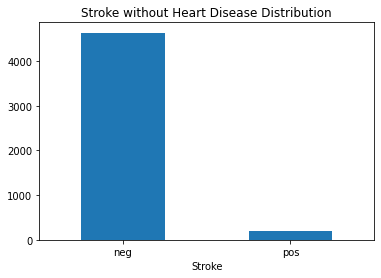

Among those that do not have heart disease, most do not have strokes, even moreso than those who have not had heart disease. The rate is 202/4632 which is 4%. 
This is significantly lower than the heart disease graph above.


In [51]:
no_heart['stroke'].value_counts().plot(kind='bar')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.title('Stroke without Heart Disease Distribution');
plt.show()
print('Among those that do not have heart disease, most do not have strokes, even moreso than those who have not had heart disease. The rate is 202/4632 which is 4%. \nThis is significantly lower than the heart disease graph above.')

#### Grouped by Hypertension

In [52]:
hyper_group = eda_stroke.groupby(['hypertension','stroke']).mean().reset_index()
hyper_group

,hypertension,stroke,age,avg_glucose_level,bmi
0,neg,neg,40.112820,102.488738,28.423885
1,neg,pos,66.832350,129.278087,30.041366
2,pos,neg,61.027778,128.445301,32.941719
3,pos,pos,70.212121,141.602273,30.706961


In [53]:
hyper_group_glu = hyper_group.sort_values(by = 'avg_glucose_level')
hyper_group_glu

,hypertension,stroke,age,avg_glucose_level,bmi
0,neg,neg,40.112820,102.488738,28.423885
2,pos,neg,61.027778,128.445301,32.941719
1,neg,pos,66.832350,129.278087,30.041366
3,pos,pos,70.212121,141.602273,30.706961


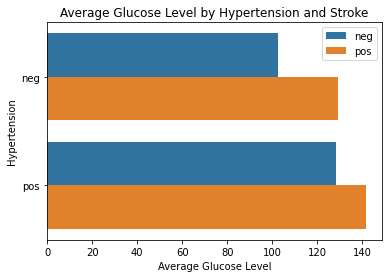

Those with hypertension also have higher glucose levels on average compared to their negative hypertension counterparts. 
Those that have hypertension as well as high glucose levels also get a stroke, while those that do not have hypertension along with a lower glucose level have not had a stroke.


In [54]:
sns.barplot(data = hyper_group_glu, x = 'avg_glucose_level', y = 'hypertension', hue = 'stroke')
plt.title('Average Glucose Level by Hypertension and Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Hypertension')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('Those with hypertension also have higher glucose levels on average compared to their negative hypertension counterparts. \nThose that have hypertension as well as high glucose levels also get a stroke, while those that do not have hypertension along with a lower glucose level have not had a stroke.')

In [55]:
hyper_group_age = hyper_group.sort_values(by = 'age')
hyper_group_age

,hypertension,stroke,age,avg_glucose_level,bmi
0,neg,neg,40.112820,102.488738,28.423885
2,pos,neg,61.027778,128.445301,32.941719
1,neg,pos,66.832350,129.278087,30.041366
3,pos,pos,70.212121,141.602273,30.706961


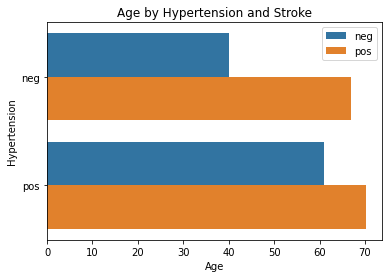

No significant difference between the two groups of negative and positive hypertension who have had strokes. 
The younger people seem to be more healthy as they have no hypertension and have not had a stroke. 
The older people tend to either have had a stroke or have hypertension.


In [56]:
sns.barplot(data = hyper_group_glu, x = 'age', y = 'hypertension', hue = 'stroke')
plt.title('Age by Hypertension and Stroke')
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('No significant difference between the two groups of negative and positive hypertension who have had strokes. \nThe younger people seem to be more healthy as they have no hypertension and have not had a stroke. \nThe older people tend to either have had a stroke or have hypertension.')

#### Graph for highest correlation

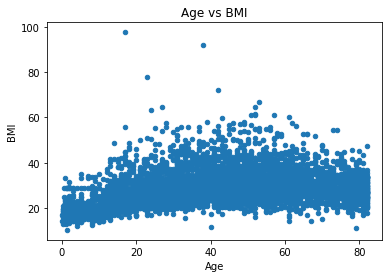

As shown in the heatmap, there does seem to be a positive correlation with some outliers. The older patients generally have higher BMI. 
However, the correlation is not too strong or noticeable.


In [57]:
#age and bmi with correlation of 0.33
eda_stroke.plot.scatter(x = 'age', y = 'bmi')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI');
plt.show()
print('As shown in the heatmap, there does seem to be a positive correlation with some outliers. The older patients generally have higher BMI. \nHowever, the correlation is not too strong or noticeable.')

### Two Visualizations Chosen for Stakeholder

Heart Disease Filters to get Stroke Count (Following two are not multivariate, but was an interesting trend found)
- From those who have heart disease, they have around a 21% chance of getting a stroke, whereas those who do not have heart disease only have a 4% chance of having a stroke.
- Value Counts
  - Heart Disease: 47/229 (pos/neg)
  - No Heart Disease: 202/4632 (pos/neg)
- Those with heart disease are at more risk of having a stroke
- If the stakeholder is an insurance company they should keep in mind holders that have heart disease as they would cost more in the future

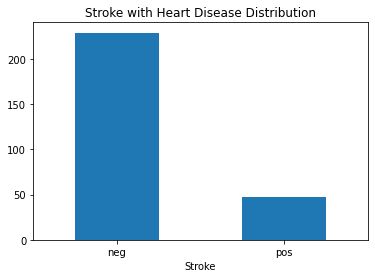

In [58]:
heartdisease['stroke'].value_counts().plot(kind='bar')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.title('Stroke with Heart Disease Distribution');

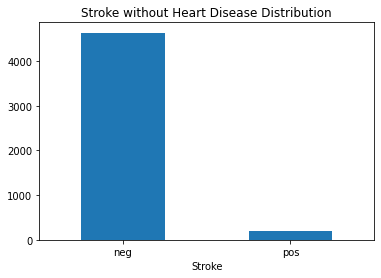

In [59]:
no_heart['stroke'].value_counts().plot(kind='bar')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.title('Stroke without Heart Disease Distribution');
plt.show()

Average Glucose by Heart Disease and Stroke graph
- This graph shows those with heart disease also tend to have higher glucose levels on average than those who do not have the disease
- Within the positive heart disease group, ones that have had a stroke have much higher glucose levels than all the others
- Within the negative heart disease group, those who have had a stroke also have a much higher glucose level than those who have not had a stroke
- Could be a correlation between having heart disease and high glucose and the possibility of having a stroke
- If stakeholder is an insurance company they should be more cautious of holders with a heart disease and high glucose levels as they are more at risk of getting a stroke, being more costly

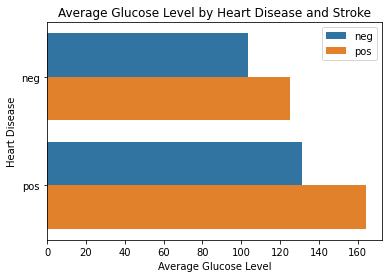

Those who have had heart disease all have higher glucose levels then their respective counterparts who have not. 
Furthermore, those who have had heart disease along with a significant high glucose level seem to get strokes.


In [60]:
sns.barplot(data = heart_group_glu, x = 'avg_glucose_level', y = 'heart_disease', hue = 'stroke')
plt.title('Average Glucose Level by Heart Disease and Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Heart Disease')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('Those who have had heart disease all have higher glucose levels then their respective counterparts who have not. \nFurthermore, those who have had heart disease along with a significant high glucose level seem to get strokes.')

Age by Hypertension and Stroke
- Graphs shows the group with hypertension also seems to be older than their non-hypertension counterparts
  - Those with hypertension who have not had strokes are older than those without hypertension who have also not had strokes
  - Those with hypertension who HAVE had strokes are older than those without hypertension who have also had strokes
- If stakeholder is an insurance company they should be cautious of holders who have hypertension and are older as they would be more costly with higher risk of having a stroke

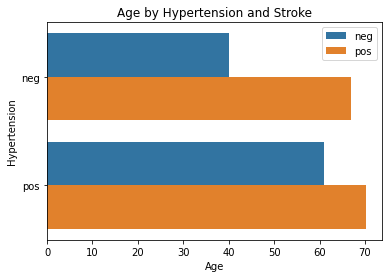

No significant difference between the two groups of negative and positive hypertension who have had strokes. 
The younger people seem to be more healthy as they have no hypertension and have not had a stroke. 
The older people tend to either have had a stroke or have hypertension.


In [61]:
sns.barplot(data = hyper_group_glu, x = 'age', y = 'hypertension', hue = 'stroke')
plt.title('Age by Hypertension and Stroke')
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.legend(bbox_to_anchor=(1,1));
plt.show()
print('No significant difference between the two groups of negative and positive hypertension who have had strokes. \nThe younger people seem to be more healthy as they have no hypertension and have not had a stroke. \nThe older people tend to either have had a stroke or have hypertension.')